## Problem 1: Pandas Syntax (Lectures 18, 19)

The purpose of this problem is to reinforce pandas syntax. We will use the `pokemon.csv` file that was introduced in Lecture 18. Start by reading in the `pokemon.csv` file into a pandas dataframe called `pokemon`, as in Lecture 18 (be sure to add in the `index_col` hyperparameter as in lecture!):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon = pd.read_csv('pokemon.csv', index_col = 1)

a.)

How many pokemon in the dataframe *have only one type*? Namely, how many pokemon *have a Type 1*, but *have no entry for a Type 2*? (There are multiple ways of finding this out)



In [3]:
import math

len([i for i in zip(pokemon["Type 1"], pokemon["Type 2"]) if type(i[1]) == float and math.isnan(i[1])])

386

b.)

Extract a dataframe `attackingWater` consisting of pokemon which 
- Either have `Type 1` or `Type 2` equal to `'Water'`, *and*
- Have a base `Attack` stat *strictly greater than* `110`.

Execute `attackingWater.head()` to display the first 5 pokemon of this new dataframe.

In [5]:
attackingWater = pokemon.loc[((pokemon["Type 1"] == "Water") | (pokemon["Type 2"] == "Water")) & (pokemon["Attack"] > 110)]

In [6]:
attackingWater.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Kingler,99,Water,NaN,475,55,130,115,50,50,75,1,False
Gyarados,130,Water,Flying,540,95,125,79,60,100,81,1,False
GyaradosMega Gyarados,130,Water,Dark,640,95,155,109,70,130,81,1,False
Kabutops,141,Rock,Water,495,60,115,105,65,70,80,1,False
SwampertMega Swampert,260,Water,Ground,635,100,150,110,95,110,70,3,False


c.) 

Which value of `Type 1` has the *quickest* pokemon on average? I.e. if you group pokemon by *their first type*, which group has the highest average speed?

In [18]:
pokemon.groupby(["Type 1"]).mean().sort_values("Speed", ascending = False).head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516


d.) 

Change your `pokemon` dataframe so that any pokemon from Generation 1 is automatically considered Legendary. After making this change, print out the new row corresponding to `Pikachu` and to `Donphan` to verify the change happened correctly.

In [33]:
pokemon.loc[pokemon["Generation"] == 1, "Legendary"] = True
pokemon.loc[["Pikachu", "Donphan"]]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Pikachu,25,Electric,NaN,320,35,55,40,50,50,90,1,True
Donphan,232,Ground,NaN,500,90,120,120,60,60,50,2,False


## Problem 2: Pipelines and Data Processing (Lectures 18, 19)

The purpose of this problem is to study the yearly "bonuses" paid out to employees in a hypothetical company. The file `bonuses.csv` contains data for this company's employees; I have read it into a pandas DataFrame below:

In [34]:
import pandas as pd
df = pd.read_csv('bonuses.csv')
df.head()

,Bonus,PerformanceReview,Salary,OvertimeWorked
0,43546,Good,149986.0,18
1,19161,Average,78218.0,8
2,24716,Bad,NaN,19
3,39422,Good,207102.0,4
4,36285,Average,198761.0,4


a.) There are 75 missing salaries in the dataframe. Impute these values by replacing the null entries with the *mean salary* in this company.

In [43]:
avgSalary = df[" Salary"].mean()
print(avgSalary)
#df.loc[df[" Salary"] == NaN, "Salary"] = avgSalary
df.loc[[math.isnan(entry) == True for entry in df[" Salary"]], " Salary"] = avgSalary

148512.38594594595


In [44]:
df.head()

,Bonus,PerformanceReview,Salary,OvertimeWorked
0,43546,Good,149986.000000,18
1,19161,Average,78218.000000,8
2,24716,Bad,148512.385946,19
3,39422,Good,207102.000000,4
4,36285,Average,198761.000000,4


b.) Create and add a new `NumPerformanceReview` column to the dataframe. This new column should turn the *categorical data* in the `PerformanceReview` column into *numeric data* by using Scikit Learn's *ordinal encoder* (which has already been imported for you).

In [47]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [["Bad", "Average", "Good"]])
performance = df[[" PerformanceReview"]]
enc.fit(performance)
df["NumPerformanceReview"] = enc.fit_transform(performance)

In [48]:
df.head()

,Bonus,PerformanceReview,Salary,OvertimeWorked,NumPerformanceReview
0,43546,Good,149986.000000,18,2.0
1,19161,Average,78218.000000,8,1.0
2,24716,Bad,148512.385946,19,0.0
3,39422,Good,207102.000000,4,2.0
4,36285,Average,198761.000000,4,1.0


c.) Create and add a new column `SalaryOvertime` consisting of an *interaction term* between the `Salary` and `OvertimeWorked` column. Namely, the ith entry in `SalaryOvertime` should simply be the *product* of the ith entries in `Salary` and `OvertimeWorked`.

In [55]:
df["SalaryOvertime"] = df[" Salary"] * df[" OvertimeWorked "]

In [56]:
df.head()

,Bonus,PerformanceReview,Salary,OvertimeWorked,NumPerformanceReview,SalaryOvertime
0,43546,Good,149986.000000,18,2.0,2.699748e+06
1,19161,Average,78218.000000,8,1.0,6.257440e+05
2,24716,Bad,148512.385946,19,0.0,2.821735e+06
3,39422,Good,207102.000000,4,2.0,8.284080e+05
4,36285,Average,198761.000000,4,1.0,7.950440e+05


d.) Run a regression to fit a linear model of the form
$$
bonus = \beta_0 + \beta_1*salary + \beta_2*NumPerformanceReview + \beta_3*OvertimeWorked + \beta_4*SalaryOvertime.
$$
Write the coefficients in the markdown cell below the code cell.

In [58]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(df[[" Salary", "NumPerformanceReview", " OvertimeWorked ", "SalaryOvertime"]], df["Bonus"])
ols.coef_, ols.intercept_

(array([1.03950122e-01, 4.66539399e+03, 2.16187573e+02, 9.11409201e-03]),
 -694.9945609679417)

Answer here:

- $\beta_0 = 1.03950122e-01$
- $\beta_1 = 4.66539399e+03$
- $\beta_2 = 2.16187573e+02$
- $\beta_3 = 9.11409201e-03$
- $\beta_4 = -694.9945609679417$

## Problem 3: Bias Variance Tradeoff and Overengineering (Lecture 19, Participation Check 2)

The file `hypotheticalData.csv` contains a made up data set. There are 20 rows in the data set; each row is simply a (x,y) pair. The purpose of this question is to test how well various regressions can "predict" this data set, and to introduce the "bias-variance" tradeoff. Below are import statements which could be useful:

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

The data has been read into a pandas DataFrame below.

In [60]:
df = pd.read_csv('hypotheticalData.csv')
df.head()

,x,y
0,-3.266374,5.704526
1,2.642212,8.546550
2,-7.706226,24.469135
3,-0.375630,2.718977
4,6.581119,28.876682


a.)

Make and display a scatter plot of the data set. Then create a *training data set* and a *testing data set*. The training data set should consist of the *first 15 rows* of `df`, and the *testing data set* should consist of the *last 5 rows* of `df` (don't use Scikit Learn's train test split function).

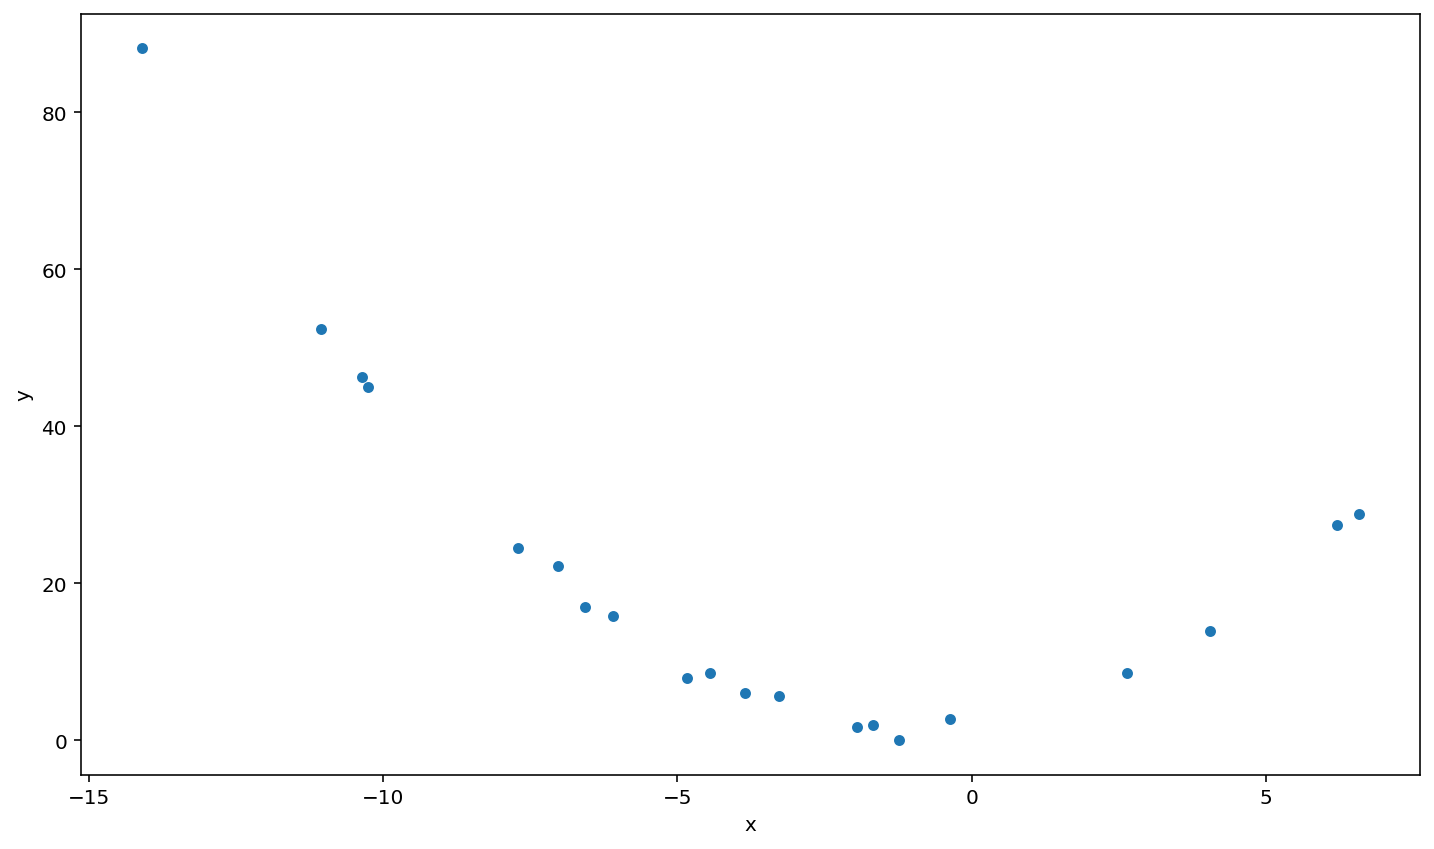

In [61]:
df.plot(kind = "scatter", x = "x", y = "y")
training = df.loc[:14]
testing = df.loc[15:]

b.) Using Scikit Learn, create a *linear regression* on the *training data set*. The *explanatory variable* should be x, and the *explained variable* should be y. Using Scikit Learn's `mean_squared_error` function, measure the total mean squared error of the model on *both the training set and the testing set*

In [64]:
explanatory = [] 
ols = LinearRegression()
ols.fit(training[["x"]], training["y"])
predict_train = ols.predict(training[["x"]])
predict_test = ols.predict(testing[["x"]])
print(mean_squared_error(predict_train, training[["y"]]))
print(mean_squared_error(predict_test, testing[["y"]]))

362.5647583801212
159.76155110221953


Your answer here:
- training error: 362.5647583801212
- testing error: 159.76155110221953

c.) Create two new data sets, `quadraticTrain` and `quadraticTest`, which equal your training and testing dataframes respectively, but with an *added column* equal to the *square* of the x-variable. Repeat part b.) for this new data set; explicitly, train a linear model on `quadraticTrain`, where you predict $y$ based on $x$ and the new $x^2$ column, and then compute the mean squared error of this model on both `quadraticTrain` and `quadraticTest`.

In [68]:
quadraticTrain = training.copy()
quadraticTest = testing.copy()
quadraticTrain["x^2"] = training["x"]**2
quadraticTest["x^2"] = testing["x"]**2
ols.fit(quadraticTrain[["x", "x^2"]], quadtraticTrain["y"])
print(mean_squared_error(ols.predict(quadraticTrain[["x", "x^2"]]), quadraticTrain[["y"]]))
print(mean_squared_error(ols.predict(quadraticTest[["x", "x^2"]]), quadraticTest[["y"]]))

0.9054139984549651
0.12599120326593286


Your answer here:
- training error: 0.9054139984549651
- testing error: 0.12599120326593286

d.) Finally, create two new data sets `overengineeredTrain` and `overengineeredTest` which equal your original training and testing dataframes, but with *many new columns* equal to `x**2, x**3, ..., x**12`. Repeat part b.) on this new data set; explicitly, train a linear model on `overengineeredTrain,` where you predict $y$ based on $x, x^2,\dots,x^{12}$, and then compute the mean squared error of this model on both `overengineeredTrain` and `overengineeredTest`. 

(Hints: You can use a for loop to add many columns to a dataframe. To regress on a lot of columns of a DataFrame, it may be helpful to use iloc. But you can also just handcode it in; either works)

In [82]:
from numpy import r_

overengineeredTrain = training.copy()
overengineeredTest = testing.copy()

for i in range(2,13):
    overengineeredTrain["x^{}".format(i)] = training["x"]**i
    overengineeredTest["x^{}".format(i)] = testing["x"]**i

ols.fit(overengineeredTrain.iloc[:, r_[0, 2:13]], overengineeredTrain["y"])
print(mean_squared_error(ols.predict(overengineeredTrain.iloc[:, r_[0, 2:13]]), overengineeredTrain[["y"]]))
print(mean_squared_error(ols.predict(overengineeredTest.iloc[:, r_[0, 2:13]]), overengineeredTest[["y"]]))

0.29860517201626074
96976.7612977168


Your answer here:
- training error: 0.29860517201626074
- testing error: 96976.7612977168

e.) Which of the three models you calculated would you "trust" most to make predictions on a new (previously unseen) dataset? I.e. if someone gave you a "random" x value which you hadn't seen before, but which fit into the context of the original data set, which model would you use to predict the corresponding y value?

Your answer here: I would trust the qaudratic model considering it's error is the lowest by far. 

## Problem 4: Hypothesis Testing, or, Are NBA Players *Really* Really Tall? (Lecture 19)

The National Basketball Association is America's professional basketball league. A common saying is that you "have to" be very tall to play professional basketball, although there are some notable exceptions (Muggsy Bogues was the shortest player to ever play in the league at 160 cm tall (5 ft 3 inches) and Spud Webb *won the freaking slam dunk competition in 1986 at only 170 cm tall (5 ft 7 inches)*; the runner up, Dominique Wilkins, was *33 cm (13 inches) taller* than Spud).

In the directory of this assignment there are three csv files, `NBA97.csv`, `NBA18.csv`, and `normal.csv`. The data sets contain information on the heights of
- the NBA players from the 1997-1998 season
- the NBA players from the 2018-2019 season
- "normal" humans


All heights are measured in centimeters. In the NBA files, the rows contain info on player names. In the average human file, each human is just assigned a random number.

These files have been read into various DataFrames below:

In [78]:
import pandas as pd
nba97 = pd.read_csv('NBA97.csv')
nba18 = pd.read_csv('NBA18.csv')
norm = pd.read_csv('normal.csv')

In [79]:
nba97.loc[nba97['player_name'] == 'Michael Jordan']

,player_name,player_height
392,Michael Jordan,198.12


In [80]:
nba18.loc[nba18['player_name'] == 'Kevin Durant']

,player_name,player_height
393,Kevin Durant,205.74


In [81]:
norm.head()

,person,cm
0,8766,170.950521
1,6458,164.469917
2,8412,158.179644
3,7790,159.635501
4,5688,159.312228


a.) 

The first two parts of this problem will determine if NBA players have "gotten taller" over time. Since there are more players in the 2018-2019 season than there were in the 1997-1998 season, we will need to first take a random sample of the players in NBA18. Create a dataframe `random18` consisting of a random sample of 441 players from the 2018-2019 season.

In [83]:
random18 = nba18.sample(n=441)
random18.head()

,player_name,player_height
27,Grayson Allen,195.58
250,Danuel House Jr.,200.66
70,Jerami Grant,205.74
68,Jeff Green,205.74
41,E'Twaun Moore,193.04


Next, create a histogram which simultaneously displays the heights in `nba97` and in `random18`, as in the frog example of Lecture 19. I have already set up the correct 'bins'; you will simply need to finish the pyplot syntax.

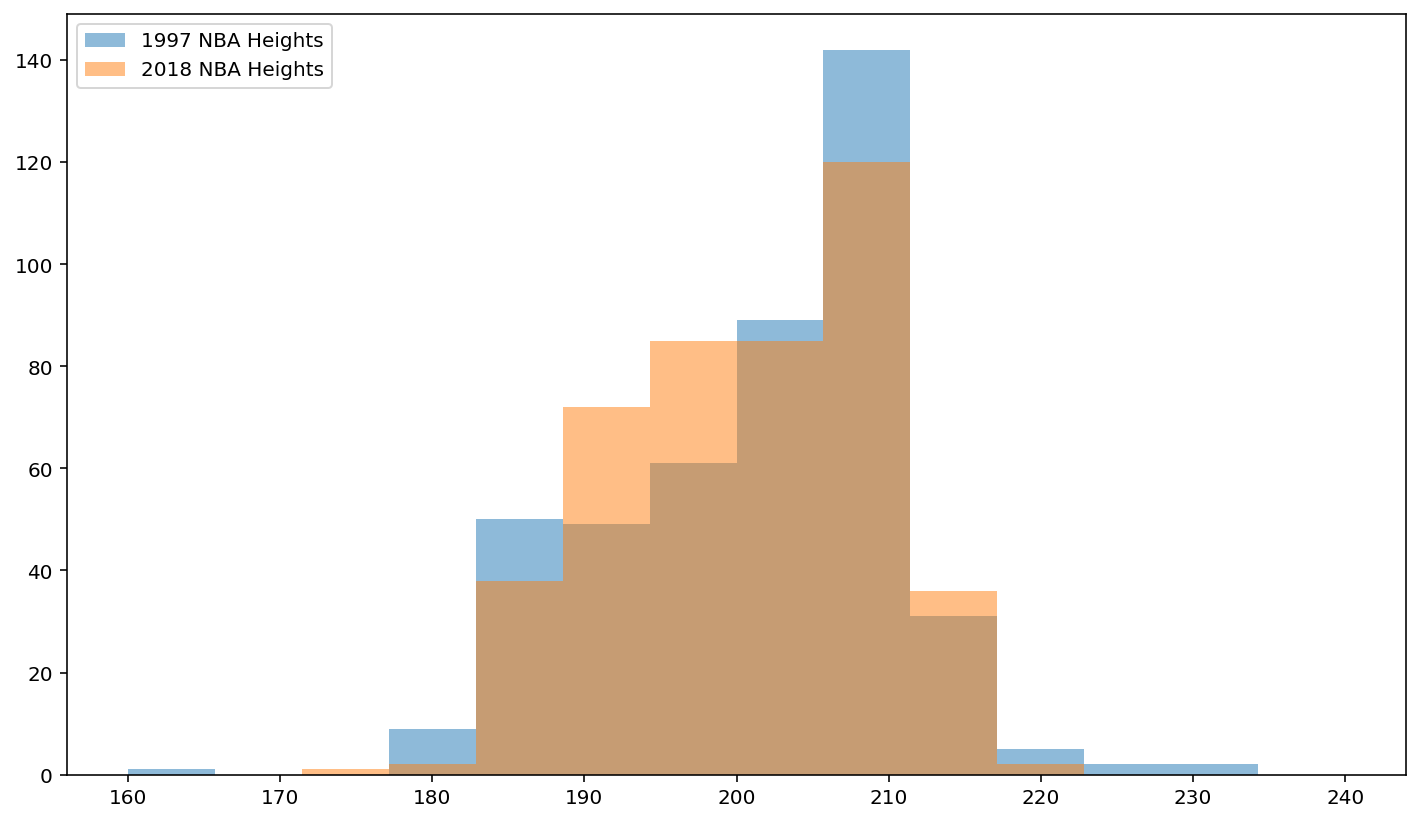

In [91]:
from matplotlib import pyplot
import numpy
bins = numpy.linspace(160, 240, 15)

plotty = pyplot.hist(nba97["player_height"], bins, alpha = 0.5, label = "1997 NBA Heights")
plotty += pyplot.hist(random18["player_height"], bins, alpha = 0.5, label = "2018 NBA Heights")
pyplot.legend(loc="upper left")

b.) 

Using scipy.stats, perform a t-test comparing the heights in `nba97` and `random18`. What $p$ value do you obtain?

In [97]:
import scipy.stats
t_test = scipy.stats.ttest_ind(nba97["player_height"], random18["player_height"])
print(t_test)

Ttest_indResult(statistic=0.7690709636431975, pvalue=0.44205754440116996)


Your answer here: The pvalue is around 0.44, so this means we can not conclude there is a difference in the heights.

c.) 

The final two parts of this problem will compare NBA players to the general population. We will choose to compare `nba18` to `norm` (a similar story would be told if you used `nba97`).

As in part a.), the number of entries in these frames is not the same. Create a random sample of 530 entries from norm and put it into a `randomNorm` dataframe.

In [93]:
randomNorm = norm.sample(n=530)
randomNorm.head()

,person,cm
638,1697,173.131852
83,844,181.678701
147,1375,161.058728
105,6387,161.283151
693,2342,173.634583


Next, create a histogram which simultaneously displays the heights in `nba18` and in `randomNorm`, as in the frog example of Lecture 19. I have already set up the correct 'bins'; you will simply need to finish the pyplot syntax.

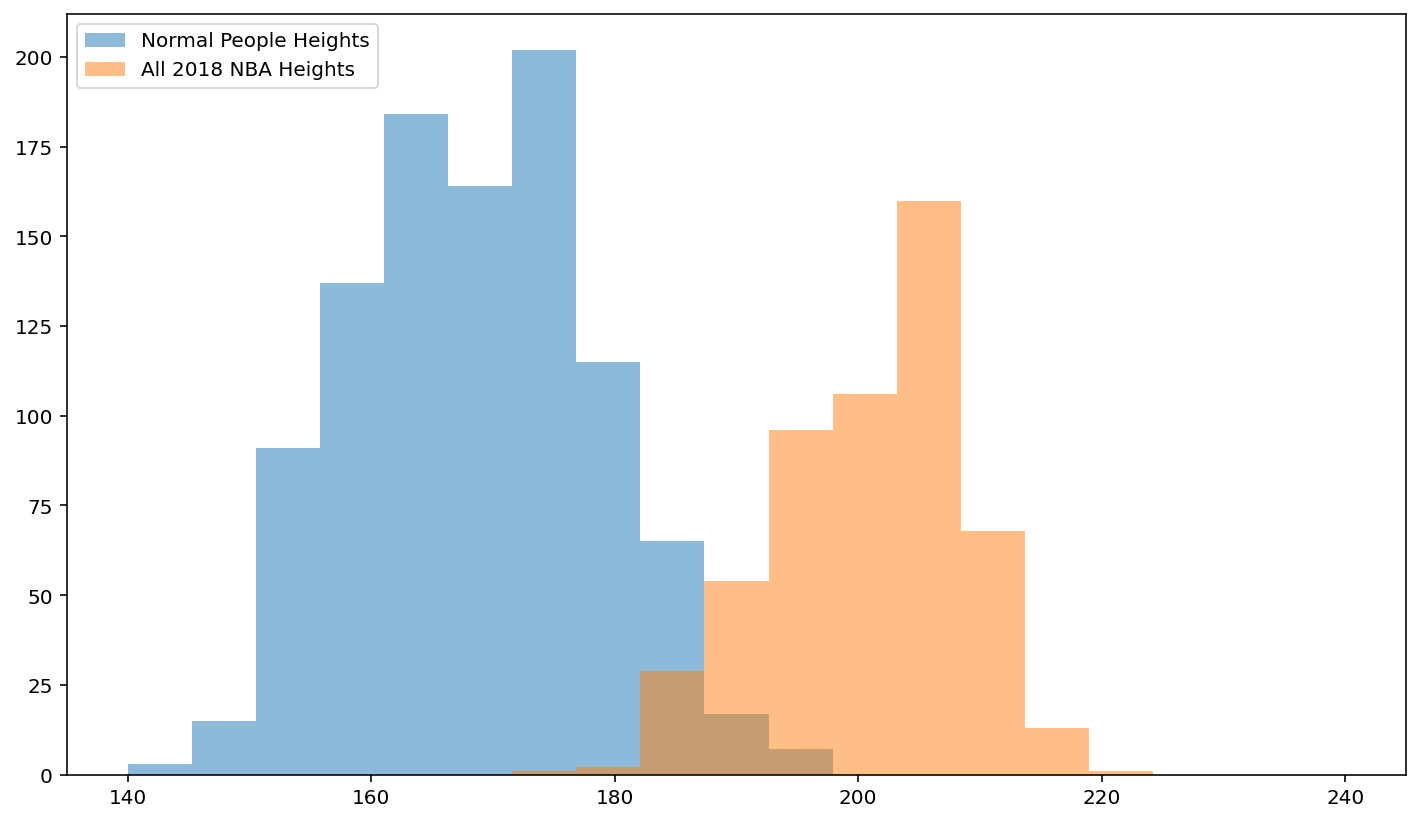

In [95]:
from matplotlib import pyplot
import numpy
bins = numpy.linspace(140, 240, 20)

plotty = pyplot.hist(norm["cm"], bins, alpha = 0.5, label = "Normal People Heights")
plotty += pyplot.hist(nba18["player_height"], bins, alpha = 0.5, label = "All 2018 NBA Heights")
pyplot.legend(loc="upper left")

d.)

Using scipy.stats, perform a t-test comparing the heights in `nba18` and `randomNorm`. What $p$ value do you obtain?

In [98]:
import scipy.stats
t_test1 = scipy.stats.ttest_ind(nba18["player_height"], norm["cm"])
print(t_test1)

Ttest_indResult(statistic=63.68202746837539, pvalue=0.0)


Your answer here: The pvalue is 0.0, meaning that it is very clear that the heights are different, and by the histogram we can tell that obviously NBA18 player heights are much greater than the heights of average humans. 

## Problem 5: Simpson's Paradox (Lecture NaN; just use your thinking)

Simpson's paradox is very cool.

a.)

This example is (essentially) taken from this research article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1339981/

A drug company is testing two treatments for kidney stones to see which treatment is most effective. The drug company tests each treatment on 350 individuals. After the experimentation, the company noticed that the drug had different effects on people with *large kidney stones* compared to people with *small kidney stones*. The success rate of each treatment is summarized below:

\;\; | Treatment A     | Treatment B |
------| ----------- | ----------- |
Small Stones| 81 cured out of 87    |    234 cured out of 270 |
Large Stones| 192 cured out of 263  | 55 cured out of 80      |


Compute the success rate (as a percentage) for the different treatments on: Large Stones, Small Stones, and Kidney Stones in general. Enter your answers into the partially filled markdown cell below:

In [1]:
print("Treatment A: Small Stone Success Rate:", float(81/87))
print("Treatment A: Large Stone Success Rate:", float(192/263))
print("Treatment B: Small Stone Success Rate:", float(234/270))
print("Treatment B: Large Stone Success Rate:", float(55/80))
print("Treatment A Success Rate: ", float((81+192)/(87+263)))
print("Treatment B Success Rate:", float((234+55)/(270+80)))

Treatment A: Small Stone Success Rate: 0.9310344827586207
Treatment A: Large Stone Success Rate: 0.7300380228136882
Treatment B: Small Stone Success Rate: 0.8666666666666667
Treatment B: Large Stone Success Rate: 0.6875
Treatment A Success Rate:  0.78
Treatment B Success Rate: 0.8257142857142857


Answer here:

\;\; | Treatment A     | Treatment B |
------| ----------- | ----------- |
Small Stone Success Rate| 93.10344827586207%|86.66666666666667%
Large Stone Success Rate| 73.00380228136882%|68.75%
Total Success Rate| 78%|82.57142857142857%

b.) 

If you were a doctor, which treatment plan would you recommend to a patient that had kidney stones? Why?

Your answer here: I would recommend Treatment B to the patient due to the higher total success rate. 

c.) 

There is a different form of Simpson's paradox displayed with the following made up example.

Consider the data sets `data1`, `data2`, and `data` defined below. The points in `data` have been plotted for you:

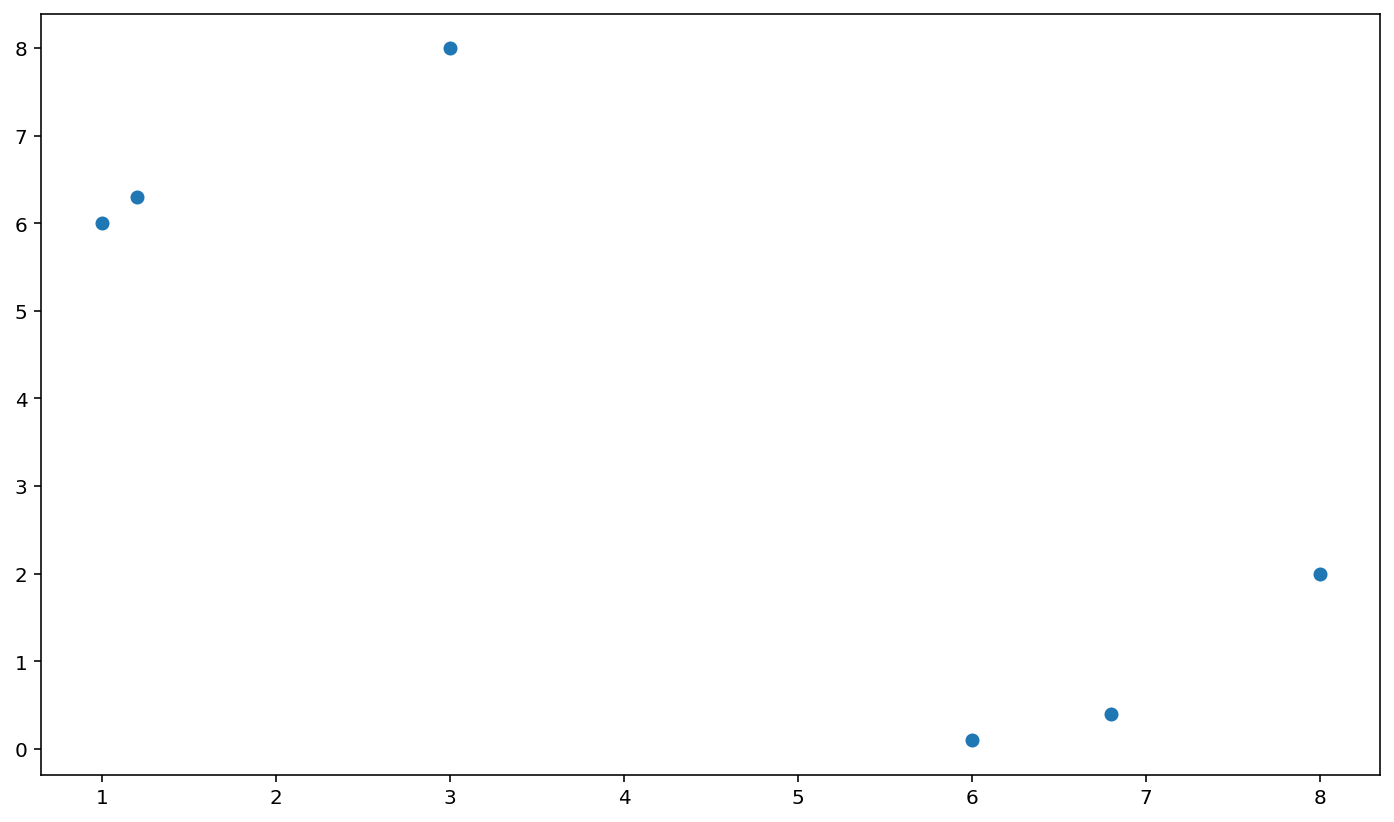

In [2]:
from matplotlib import pyplot
data1 = [(1,6),(1.2,6.3),(3,8)]
data2 = [(6,.1),(6.8,.4),(8,2)]
data = data1+data2
pyplot.scatter([i[0] for i in data], [i[1] for i in data])

Suppose you ran three linear regressions to predict y based on the explanatory variable x: one based on `data1`, one based on `data2`, and one based on `data`. Which models would result in lines with a *positive* slope? (You do not have to actually compute the regressions unless you want to)

Your answer here: data1 and data2 would have positive slopes, but data would have a negative slope because the linear regression model would attempt to find the smallest average distance between the line and the points. 